In [4]:
import torch
import torchvision
from __future__ import print_function
from torch import nn, optim, cuda
from torch.utils import data
from torchvision import datasets, transforms
import torch.nn.functional as F
import numpy as np
import time
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/mai_drive')

Mounted at /content/mai_drive


In [5]:
device = 'cuda' if cuda.is_available() else 'cpu'
print(f'Training CIFAR10 Model on {device}\n{"="*44}')

Training CIFAR10 Model on cuda


In [6]:
#CIFAR10 dataset

#데이터 정규화
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = datasets.CIFAR10(root='/content/mai_drive/My Drive/mai1/CIFAR10/', 
                              train=True, 
                              transform=transform,
                              download=True)
test_dataset = datasets.CIFAR10(root='/content/mai_drive/My Drive/mai1/CIFAR10/',
                             train=False,
                             transform=transform,
                             download=True)



Extracting /content/mai_drive/My Drive/mai1/CIFAR10/cifar-10-python.tar.gz to /content/mai_drive/My Drive/mai1/CIFAR10/
Files already downloaded and verified


In [8]:
# Data loader
batch_size = 64




train_loader = data.DataLoader(dataset=train_dataset,
                               batch_size=batch_size,
                               shuffle=True)
test_loader = data.DataLoader(dataset=test_dataset,
                              batch_size=batch_size,
                              shuffle=False)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Train Epoch : 42 | Batch Status : 10880/50000 (22%) | Loss : 0.053309
Train Epoch : 42 | Batch Status : 11520/50000 (23%) | Loss : 0.064583
Train Epoch : 42 | Batch Status : 12160/50000 (24%) | Loss : 0.027272
Train Epoch : 42 | Batch Status : 12800/50000 (26%) | Loss : 0.079302
Train Epoch : 42 | Batch Status : 13440/50000 (27%) | Loss : 0.023619
Train Epoch : 42 | Batch Status : 14080/50000 (28%) | Loss : 0.139170
Train Epoch : 42 | Batch Status : 14720/50000 (29%) | Loss : 0.021389
Train Epoch : 42 | Batch Status : 15360/50000 (31%) | Loss : 0.139477
Train Epoch : 42 | Batch Status : 16000/50000 (32%) | Loss : 0.221144
Train Epoch : 42 | Batch Status : 16640/50000 (33%) | Loss : 0.145752
Train Epoch : 42 | Batch Status : 17280/50000 (35%) | Loss : 0.012250
Train Epoch : 42 | Batch Status : 17920/50000 (36%) | Loss : 0.059861
Train Epoch : 42 | Batch Status : 18560/50000 (37%) | Loss : 0.084140
Train Epoch : 42 | Batch Status : 19200/50000 (38%) | 

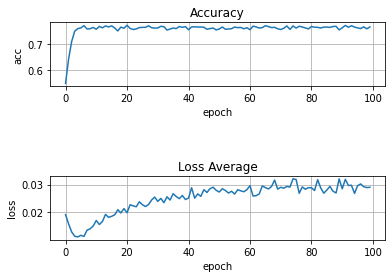

Total time : 0m  13s 
Model was trained on cuda!


In [13]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.l1 = nn.Conv2d(3, 16, 3, stride=1, padding = 1)   #입력채널수, 결과채널수, 필터크기
    self.l2 = nn.Conv2d(16, 32, 3, padding = 1)
    self.l3 = nn.Conv2d(32, 64, 3, padding = 1)
    self.l4 = nn.Conv2d(64, 128, 3, padding = 1)
    self.l5 = nn.Conv2d(128, 128, 3, padding = 1)
    self.l6 = nn.Conv2d(128, 256, 3, padding = 1)
    self.l7 = nn.Conv2d(256, 256, 3, padding = 1)

    self.l8 = nn.Linear(1024, 1024)
    self.l9 = nn.Linear(1024, 10)

  def forward(self, x):  
    x = F.relu(self.l1(x))  
    x = F.max_pool2d(F.relu(self.l2(x)), 2)
    x = F.relu(self.l3(x))     
    x = F.max_pool2d(F.relu(self.l4(x)), 2)
    x = F.max_pool2d(F.relu(self.l5(x)), 2)
    x = F.relu(self.l6(x))
    x = F.max_pool2d(F.relu(self.l7(x)), 2)
    x = x.view(-1, 1024)  
    x = F.relu(self.l8(x))

    return self.l9(x)



model = Net()
model.to(device)



criterion = nn.CrossEntropyLoss()     #비용함수
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.000001 )      #옵티마이저, regularization

def train(epoch):
  model.train()

  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch : {} | Batch Status : {}/{} ({:.0f}%) | Loss : {:.6f}'.format(
          epoch, batch_idx*len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))






def test():
  model.eval()
  test_loss = 0
  correct = 0

  for data, target in test_loader:
    data, target = data.to(device), target.to(device)
    output = model(data)
    test_loss += criterion(output, target).item()
    pred = output.data.max(1, keepdim=True)[1]
    correct += pred.eq(target.data.view_as(pred)).cpu().sum()

  test_loss /= len(test_loader.dataset)

  global acc #### 전역변수로 설정
  acc = correct/len(test_loader.dataset) ####
  acc = acc.tolist() ###
  acc = [acc]
  print(acc) ###

  global lossAvg   ####
  lossAvg = test_loss#####
  lossAvg = [lossAvg]#####
  print(lossAvg)#####

  print(f'==================\nTest set: Average loss : {test_loss:.4f}, Accuracy : {correct}/{len(test_loader.dataset)}'
        f'({100. * correct / len(test_loader.dataset):.0f}%)')

  




if __name__ == '__main__':
 
  since = time.time()
  
  accList = []######
  lossAvgList = [] #####
 
  for epoch in range(1, 101):

    epoch_start = time.time()
    train(epoch)
    m, s = divmod(time.time() - epoch_start, 60)
    print(f'Training time: {m:.0f}m {s:.0f}s')
    
    test()

    accList = accList +acc##########
    lossAvgList = lossAvgList + lossAvg ########
  
    
    m, s = divmod(time.time() - epoch_start, 60)
    print(f'Tesing time: {m:.0f}m {s:.0f}s')
  

  print(accList)  ############
  print(lossAvgList)  ############

  plt.subplot(311)#####
  plt.title("Accuracy")####
  plt.plot(accList)  ####
  plt.xlabel("epoch")#####
  plt.ylabel("acc")#####
  plt.grid(True)#####


  plt.subplot(313)######
  plt.title("Loss Average")#####
  plt.plot(lossAvgList)  ####
  plt.xlabel("epoch")#####
  plt.ylabel("loss")#####
  plt.grid(True)#####

  plt.show()#######




  m, s = divmod(time.time() - epoch_start, 60)
  print(f'Total time : {m:.0f}m {s: .0f}s \nModel was trained on {device}!')




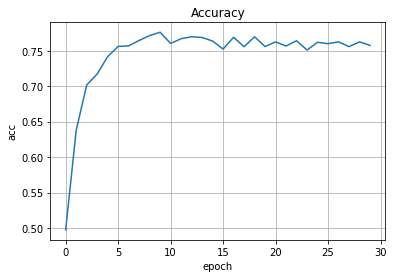

In [81]:
  plt.title("Accuracy")####
  plt.plot(accList)  ####
  plt.xlabel("epoch")#####
  plt.ylabel("acc")#####
  plt.grid(True)#####

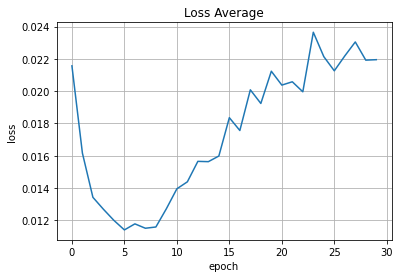

In [82]:
  plt.title("Loss Average")#####
  plt.plot(lossAvgList)  ####
  plt.xlabel("epoch")#####
  plt.ylabel("loss")#####
  plt.grid(True)#####

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Train Epoch : 42 | Batch Status : 10880/50000 (22%) | Loss : 0.037274
Train Epoch : 42 | Batch Status : 11520/50000 (23%) | Loss : 0.022678
Train Epoch : 42 | Batch Status : 12160/50000 (24%) | Loss : 0.001716
Train Epoch : 42 | Batch Status : 12800/50000 (26%) | Loss : 0.051073
Train Epoch : 42 | Batch Status : 13440/50000 (27%) | Loss : 0.036680
Train Epoch : 42 | Batch Status : 14080/50000 (28%) | Loss : 0.009333
Train Epoch : 42 | Batch Status : 14720/50000 (29%) | Loss : 0.129547
Train Epoch : 42 | Batch Status : 15360/50000 (31%) | Loss : 0.202717
Train Epoch : 42 | Batch Status : 16000/50000 (32%) | Loss : 0.020568
Train Epoch : 42 | Batch Status : 16640/50000 (33%) | Loss : 0.015079
Train Epoch : 42 | Batch Status : 17280/50000 (35%) | Loss : 0.024532
Train Epoch : 42 | Batch Status : 17920/50000 (36%) | Loss : 0.003113
Train Epoch : 42 | Batch Status : 18560/50000 (37%) | Loss : 0.026467
Train Epoch : 42 | Batch Status : 19200/50000 (38%) | 

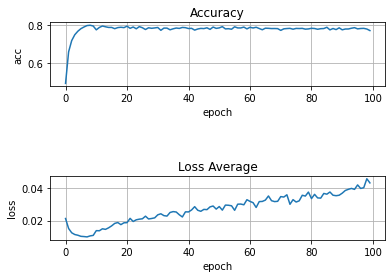

Total time : 0m  13s 
Model was trained on cuda!


In [12]:
### average pooling 사용
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.l1 = nn.Conv2d(3, 16, 3, stride=1, padding = 1)   #입력채널수, 결과채널수, 필터크기
    self.l2 = nn.Conv2d(16, 32, 3, padding = 1)
    self.l3 = nn.Conv2d(32, 64, 3, padding = 1)
    self.l4 = nn.Conv2d(64, 128, 3, padding = 1)
    self.l5 = nn.Conv2d(128, 128, 3, padding = 1)
    self.l6 = nn.Conv2d(128, 256, 3, padding = 1)
    self.l7 = nn.Conv2d(256, 256, 3, padding = 1)

  def forward(self, x):  
    x = F.relu(self.l1(x))  
    x = F.max_pool2d(F.relu(self.l2(x)), 2)
    x = F.relu(self.l3(x))     
    x = F.max_pool2d(F.relu(self.l4(x)), 2)
    x = F.max_pool2d(F.relu(self.l5(x)), 2)
    x = F.relu(self.l6(x))
    x = F.avg_pool2d(F.max_pool2d(F.relu(self.l7(x)), 2), kernel_size = 2)
    x = x.view(-1, 256)  


    return x



model = Net()
model.to(device)



criterion = nn.CrossEntropyLoss()     #비용함수
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.000001)      #옵티마이저

def train(epoch):
  model.train()

  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch : {} | Batch Status : {}/{} ({:.0f}%) | Loss : {:.6f}'.format(
          epoch, batch_idx*len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))
    



def test():
  model.eval()
  test_loss = 0
  correct = 0

  for data, target in test_loader:
    data, target = data.to(device), target.to(device)
    output = model(data)
    test_loss += criterion(output, target).item()
    pred = output.data.max(1, keepdim=True)[1]
    correct += pred.eq(target.data.view_as(pred)).cpu().sum()

  test_loss /= len(test_loader.dataset)

  global acc1 #### 전역변수로 설정
  acc1 = correct/len(test_loader.dataset) ####
  acc1 = acc1.tolist() ###
  acc1 = [acc1]
  print(acc1) ###

  global lossAvg1   ####
  lossAvg1 = test_loss#####
  lossAvg1 = [lossAvg1]#####
  print(lossAvg1)#####


  print(f'==================\nTest set: Average loss : {test_loss:.4f}, Accuracy : {correct}/{len(test_loader.dataset)}'
        f'({100. * correct / len(test_loader.dataset):.0f}%)')




if __name__ == '__main__':
 
  since = time.time()
  accList1 = []######
  lossAvgList1 = [] #####

  for epoch in range(1, 101):
    epoch_start = time.time()
    train(epoch)
    m, s = divmod(time.time() - epoch_start, 60)
    print(f'Training time: {m:.0f}m {s:.0f}s')
    
    test()
    
    accList1 = accList1 +acc1##########
    lossAvgList1 = lossAvgList1 + lossAvg1 ########

    m, s = divmod(time.time() - epoch_start, 60)
    print(f'Tesing time: {m:.0f}m {s:.0f}s')
  

  print(accList1)  ############
  print(lossAvgList1)  ############

  plt.subplot(311)#####
  plt.title("Accuracy")####
  plt.plot(accList1)  ####
  plt.xlabel("epoch")#####
  plt.ylabel("acc")#####
  plt.grid(True)#####


  plt.subplot(313)######
  plt.title("Loss Average")#####
  plt.plot(lossAvgList1)  ####
  plt.xlabel("epoch")#####
  plt.ylabel("loss")#####
  plt.grid(True)#####

  plt.show()#######



  m, s = divmod(time.time() - epoch_start, 60)
  print(f'Total time : {m:.0f}m {s: .0f}s \nModel was trained on {device}!')



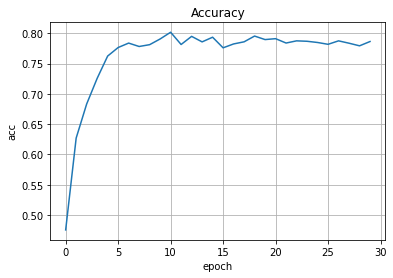

In [84]:
  plt.title("Accuracy")####
  plt.plot(accList1)  ####
  plt.xlabel("epoch")#####
  plt.ylabel("acc")#####
  plt.grid(True)#####

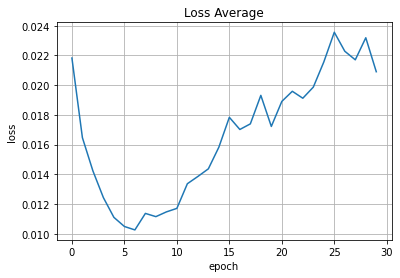

In [85]:
  plt.title("Loss Average")#####
  plt.plot(lossAvgList1)  ####
  plt.xlabel("epoch")#####
  plt.ylabel("loss")#####
  plt.grid(True)#####

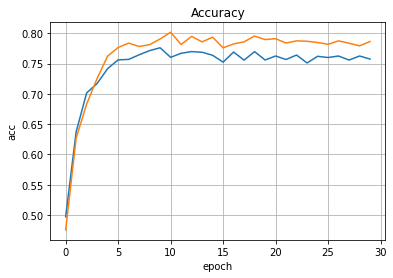

In [86]:
plt.title("Accuracy")####
plt.plot(accList)
plt.plot(accList1)  ####
plt.xlabel("epoch")#####
plt.ylabel("acc")#####
plt.grid(True)#####

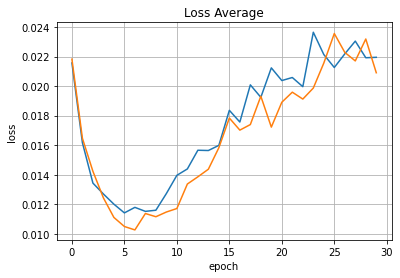

In [87]:
plt.title("Loss Average")#####
plt.plot(lossAvgList) 
plt.plot(lossAvgList1) 
plt.xlabel("epoch")#####
plt.ylabel("loss")#####
plt.grid(True)#####

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Train Epoch : 42 | Batch Status : 10880/50000 (22%) | Loss : 0.512120
Train Epoch : 42 | Batch Status : 11520/50000 (23%) | Loss : 0.441262
Train Epoch : 42 | Batch Status : 12160/50000 (24%) | Loss : 0.513397
Train Epoch : 42 | Batch Status : 12800/50000 (26%) | Loss : 0.301161
Train Epoch : 42 | Batch Status : 13440/50000 (27%) | Loss : 0.622946
Train Epoch : 42 | Batch Status : 14080/50000 (28%) | Loss : 0.590705
Train Epoch : 42 | Batch Status : 14720/50000 (29%) | Loss : 0.667811
Train Epoch : 42 | Batch Status : 15360/50000 (31%) | Loss : 0.154497
Train Epoch : 42 | Batch Status : 16000/50000 (32%) | Loss : 0.414496
Train Epoch : 42 | Batch Status : 16640/50000 (33%) | Loss : 0.456307
Train Epoch : 42 | Batch Status : 17280/50000 (35%) | Loss : 0.461541
Train Epoch : 42 | Batch Status : 17920/50000 (36%) | Loss : 0.521258
Train Epoch : 42 | Batch Status : 18560/50000 (37%) | Loss : 0.218454
Train Epoch : 42 | Batch Status : 19200/50000 (38%) | 

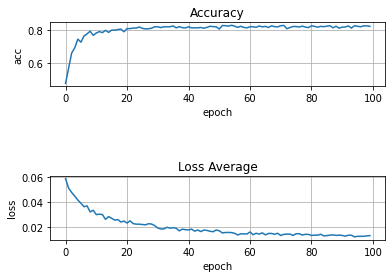

Total time : 0m  14s 
Model was trained on cuda!


In [10]:
### dropout + average pooling 사용
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.l1 = nn.Conv2d(3, 16, 3, stride=1, padding = 1)   #입력채널수, 결과채널수, 필터크기
    self.l2 = nn.Conv2d(16, 32, 3, padding = 1)
    self.l3 = nn.Conv2d(32, 64, 3, padding = 1)
    self.l4 = nn.Conv2d(64, 128, 3, padding = 1)
    self.l5 = nn.Conv2d(128, 128, 3, padding = 1)
    self.l6 = nn.Conv2d(128, 256, 3, padding = 1)
    self.l7 = nn.Conv2d(256, 256, 3, padding = 1)
    self.dropout = nn.Dropout(0.5)


  def forward(self, x):  
    x = F.relu(self.l1(x))  
    x = F.max_pool2d(F.relu(self.l2(x)), 2)
    x = F.relu(self.l3(x))     
    x = F.max_pool2d(self.dropout(F.relu(self.l4(x))), 2)
    x = F.max_pool2d(self.dropout(F.relu(self.l5(x))), 2)
    x = F.relu(self.l6(x))
    x = F.avg_pool2d( F.max_pool2d(self.dropout(F.relu(self.l7(x))), 2), kernel_size = 2)
    x = x.view(-1, 256)  


    return x



model = Net()
model.to(device)



criterion = nn.CrossEntropyLoss()     #비용함수
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.000001)      #옵티마이저

def train(epoch):
  model.train()

  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch : {} | Batch Status : {}/{} ({:.0f}%) | Loss : {:.6f}'.format(
          epoch, batch_idx*len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))
    



def test():
  model.eval()
  test_loss = 0
  correct = 0

  for data, target in test_loader:
    data, target = data.to(device), target.to(device)
    output = model(data)
    test_loss += criterion(output, target).item()
    pred = output.data.max(1, keepdim=True)[1]
    correct += pred.eq(target.data.view_as(pred)).cpu().sum()

  test_loss /= len(test_loader.dataset)

  global acc2 #### 전역변수로 설정
  acc2 = correct/len(test_loader.dataset) ####
  acc2 = acc2.tolist() ###
  acc2 = [acc2]
  print(acc2) ###

  global lossAvg2   ####
  lossAvg2 = test_loss#####
  lossAvg2 = [lossAvg2]#####
  print(lossAvg2)#####


  print(f'==================\nTest set: Average loss : {test_loss:.4f}, Accuracy : {correct}/{len(test_loader.dataset)}'
        f'({100. * correct / len(test_loader.dataset):.0f}%)')




if __name__ == '__main__':
 
  since = time.time()
  accList2 = []######
  lossAvgList2 = [] #####

  for epoch in range(1, 101):
    epoch_start = time.time()
    train(epoch)
    m, s = divmod(time.time() - epoch_start, 60)
    print(f'Training time: {m:.0f}m {s:.0f}s')
    
    test()
    
    accList2 = accList2 +acc2##########
    lossAvgList2 = lossAvgList2 + lossAvg2 ########

    m, s = divmod(time.time() - epoch_start, 60)
    print(f'Tesing time: {m:.0f}m {s:.0f}s')
  

  print(accList2)  ############
  print(lossAvgList2)  ############

  plt.subplot(311)#####
  plt.title("Accuracy")####
  plt.plot(accList2)  ####
  plt.xlabel("epoch")#####
  plt.ylabel("acc")#####
  plt.grid(True)#####


  plt.subplot(313)######
  plt.title("Loss Average")#####
  plt.plot(lossAvgList2)  ####
  plt.xlabel("epoch")#####
  plt.ylabel("loss")#####
  plt.grid(True)#####

  plt.show()#######



  m, s = divmod(time.time() - epoch_start, 60)
  print(f'Total time : {m:.0f}m {s: .0f}s \nModel was trained on {device}!')


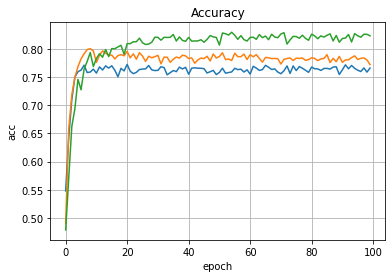

In [14]:
plt.title("Accuracy")####
plt.plot(accList)
plt.plot(accList1)  ####
plt.plot(accList2)
plt.xlabel("epoch")#####
plt.ylabel("acc")#####
plt.grid(True)#####

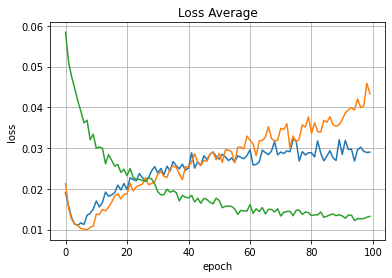

In [15]:
plt.title("Loss Average")#####
plt.plot(lossAvgList) 
plt.plot(lossAvgList1) 
plt.plot(lossAvgList2)
plt.xlabel("epoch")#####
plt.ylabel("loss")#####
plt.grid(True)#####